# Stroke Prediction

* Attributes Description

Variable | Description
--------------|-----------
id | Unique Identifier
gender | Male, Female or Other
age | Age of the patient
hypertension | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
heart_disease | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
ever_married | No or Yes
work_type | children, Govt_jov, Never_worked, Private or Self-employed
Residence_type | Rural or Urban
avg_glucose_level | Average Glucose level in blood
bmi | Body Mass Index
smoking_status | formerly smoked, never smoked, smokes or Unknown
stroke | 1 if the patient had a stroke or 0 if not

- Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# As 'id' Column is of no use. So, we drop that column
df = df.drop(['id'], 1)

In [4]:
# Statistical info
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# # Datatypes of Attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [6]:
# Check the unique values in dataset
df.apply(lambda x: len(x.unique()))

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

### Data Preprocessing

In [7]:
# To check the null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* In 'bmi' column = 201 values are null

<AxesSubplot:xlabel='bmi', ylabel='Density'>

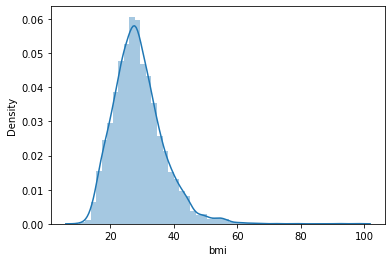

In [8]:
# Check the distribution of 'bmi'
sns.distplot(df['bmi'])

- As 'bmi' is normally distributed. So, we will fill null values with mean.

In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
# df['bmi'].replace(to_replace=np.nan, value=df['bmi'].mean(), inplace=True)

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [12]:
# print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



#### Gender

In [13]:
gender_stroke = df.groupby(["gender","stroke"])[["stroke"]].count()
gender_stroke

stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1

- We see a similar stroke rate in Male and Female. There is 'Other' gender which only have 1 sample. We remove this.

In [14]:
df_delete = df[df['gender'] == 'Other'].index
df = df.drop(df_delete)

## Exploratory Data Analysis

<AxesSubplot:xlabel='bmi'>

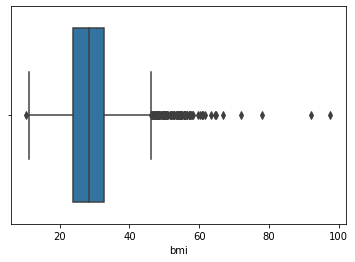

In [15]:
sns.boxplot(df['bmi'])

### Dealing with Outliers

In [16]:
q = df['bmi'].quantile(0.99)
df = df[df['bmi']<q]

* Numerical variable
 - Continous: age, avg_glucose_level, bmi
 

* Categorical : gender, stroke, smoking_status,heart_disease, ever_married, hypertension, work_type, Residence_type

In [17]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

print('-----------------------------------\n')

numerical = (df.dtypes == "float64")
numerical_list = list(numerical[numerical].index)

print("Numerical variables:")
print(numerical_list)

print('-----------------------------------\n')

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
-----------------------------------

Numerical variables:
['age', 'avg_glucose_level', 'bmi']
-----------------------------------



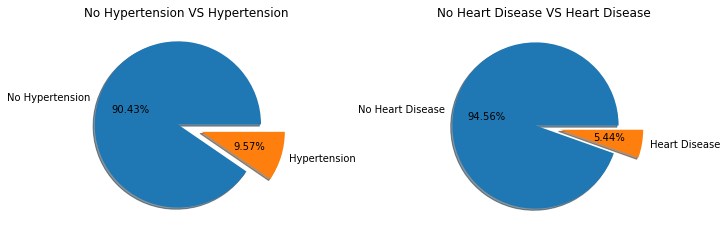

In [18]:
#----------------DATA COPY FOR VISUALIZATION--------------------

StrokeAnalysis = df.copy()

StrokeAnalysis['hypertension'] = StrokeAnalysis['hypertension'].apply(lambda x : 'Hypertension' if x == 1 else 'No Hypertension') 
StrokeAnalysis['heart_disease'] = StrokeAnalysis['heart_disease'].apply(lambda x : 'Heart Disease' if x == 1 else 'No Heart Disease') 
StrokeAnalysis['stroke'] = StrokeAnalysis['stroke'].apply(lambda x : 'Suffered Stroke' if x == 1 else 'Never Suffered Stroke') 
StrokeAnalysis['ever_married'] = StrokeAnalysis['ever_married'].apply(lambda x : 'Married' if x == 'Yes' else 'Unmarried') 


# NO HYPERTENSION VS HYPERTENSION & NO HEART DISEASE VS HEART DISEASE

plt.figure(figsize=(10,6))
placement = 1

for i in ['hypertension','heart_disease']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label, autopct='%1.2f%%', shadow=True, explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)  



* The propotion of patients with hypertension and heart diseases are very low.

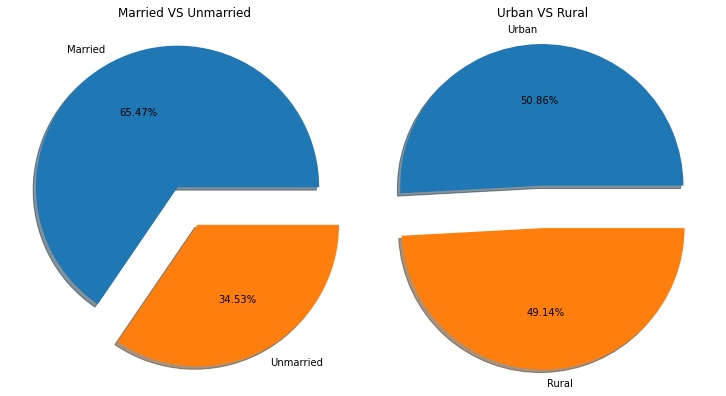

In [19]:
# MARRIED VS UNMARIED & URBAN VS RURAL

plt.figure(figsize=(10,6))
placement = 1

for i in ['ever_married','Residence_type']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4) 



* We see that the number of patients married are much more. The proportion of rural and urban patients are almost equal.

Pie plot of Work Type
------------------------------------------------------------



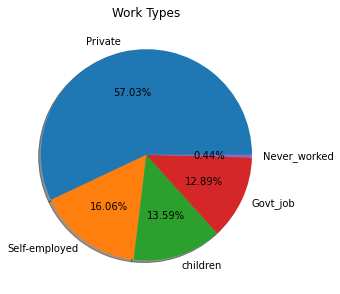

In [20]:
# WORK TYPE

print("Pie plot of Work Type")
print('------------------------------------------------------------\n')


plt.subplot(1,1,1)  
label = StrokeAnalysis['work_type'].value_counts().index
value = StrokeAnalysis['work_type'].value_counts().values
plt.pie(value, labels = label,autopct='%1.2f%%', shadow=True, explode=None)
plt.title("Work Types")

plt.tight_layout(pad=0.4) 





Visualization of the distribution of Numerical columns
------------------------------------------------------------



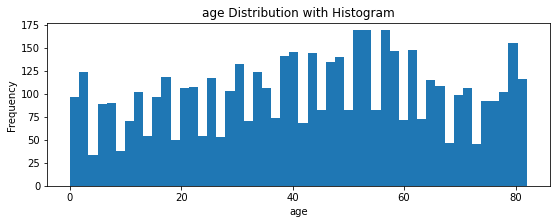

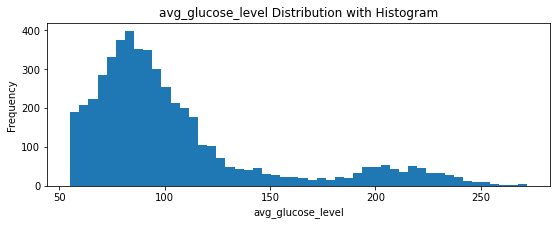

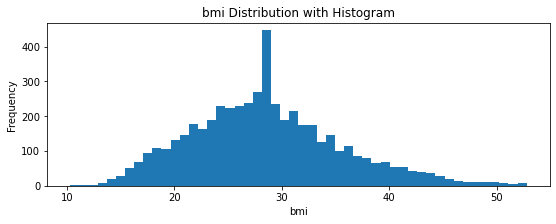

In [21]:
# Visualization of the distribution of Numerical columns

print("Visualization of the distribution of Numerical columns")
print('------------------------------------------------------------\n')


for n in numerical_list:
     plt.figure(figsize = (9,3))
     plt.hist(df[n], bins = 50)
     plt.xlabel(n)
     plt.ylabel("Frequency")
     plt.title("{} Distribution with Histogram".format(n))
     plt.show()


Visualization of stroke vs other columns
-----------------------------------------------------



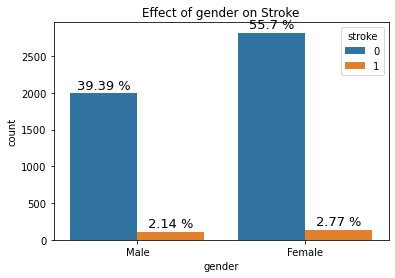

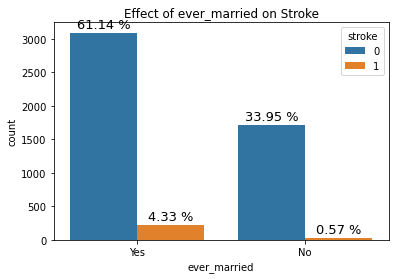

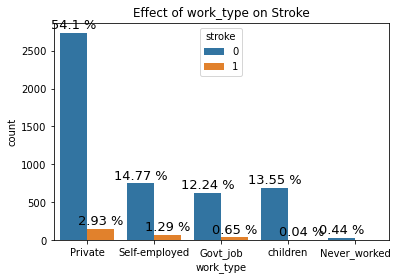

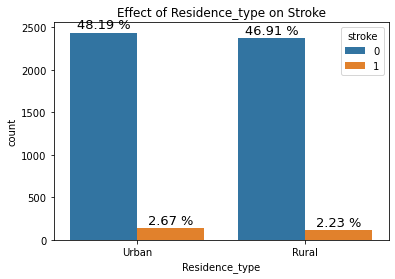

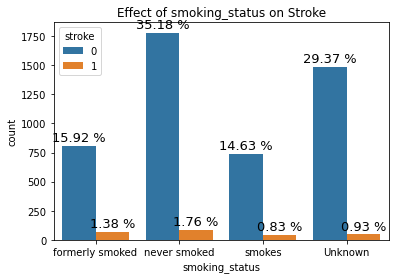

In [22]:
# Visualization of stroke vs other columns

print("Visualization of stroke vs other columns")
print('-----------------------------------------------------\n')

for i in categorical_list:
    ax = sns.countplot(data=df, x=i,hue="stroke")
    plt.title("Effect of {} on Stroke".format(i))
    
    for p in ax.patches:
        ax.annotate(f'{round(p.get_height()/len(df)*100,2)} %', xy=(p.get_x() + p.get_width() / 2,  
            p.get_height()), ha='center', va='center', size=13, xytext=(0, 8), textcoords='offset points')
    plt.show()


Heatmap Correlation
------------------------------------------------------------------



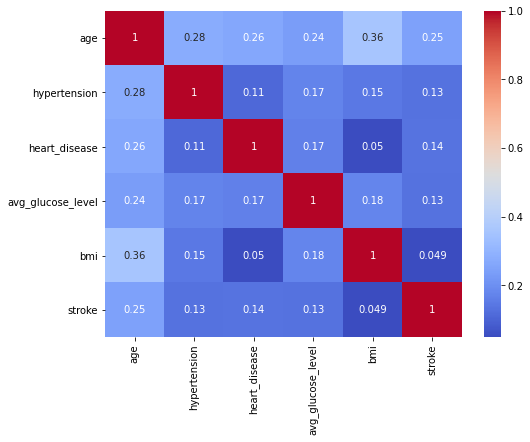

In [23]:
# Heatmap Correlation

print("Heatmap Correlation")
print('------------------------------------------------------------------\n')

plt.figure(figsize = (8,6))  
sns.heatmap(df.corr(), annot = True,cmap="coolwarm")
plt.show()


### Input Split

In [24]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Encoding Categorical Data

* Independent Variable
  - OneHotEncoder

* Dependent Variable
  - LebelEncoder

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,4,5,6,9])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [26]:
X.shape

(5057, 20)

### Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
# Initializing empty lists to append all model's name and corresponding name
accuracy = []
model = []

## Training the Model on the Training set

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc0 = accuracy_score(y_test, y_pred)

print("Logistic Regression's Accuracy :", acc0)
accuracy.append(acc0)
model.append('Logistic Regression')

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[961   0]
 [ 51   0]]
Logistic Regression's Accuracy : 0.9496047430830039
Cross-Validation Score: [0.95059289 0.95059289 0.95054402 0.95054402 0.95252226]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1012
   macro avg       0.47      0.50      0.49      1012
weighted avg       0.90      0.95      0.93      1012



### Support Vector Machine (SVM)

* Linear

In [30]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc1 = accuracy_score(y_test, y_pred)

print("Support Vector Machine ('Linear')'s Accuracy :", acc1)
accuracy.append(acc1)
model.append('Support Vector Machine (Linear)')

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[961   0]
 [ 51   0]]
Support Vector Machine ('Linear')'s Accuracy : 0.9496047430830039
Cross-Validation Score: [0.95059289 0.95059289 0.95054402 0.95153314 0.95153314]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1012
   macro avg       0.47      0.50      0.49      1012
weighted avg       0.90      0.95      0.93      1012



* Kernel

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',gamma='scale', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc2 = accuracy_score(y_test, y_pred)
accuracy.append(acc2)
model.append('Kernel SVM')
print("Kernel SVM's Accuracy :", acc2)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[961   0]
 [ 51   0]]
Kernel SVM's Accuracy : 0.9496047430830039
Cross-Validation Score: [0.95059289 0.95059289 0.95054402 0.95153314 0.95153314]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1012
   macro avg       0.47      0.50      0.49      1012
weighted avg       0.90      0.95      0.93      1012



### K - Nearest Neighbors

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train[:, 16:])
X_test_knn = sc.transform(X_test[:, 16:])

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_knn, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test_knn)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc3 = accuracy_score(y_test, y_pred)
accuracy.append(acc3)
model.append('K-Nearest Neighbors')
print("K-Nearest Neighbours's Accuracy :", acc3)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[961   0]
 [ 50   1]]
K-Nearest Neighbours's Accuracy : 0.950592885375494
Cross-Validation Score: [0.94960474 0.94960474 0.95054402 0.95054402 0.95153314]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       1.00      0.02      0.04        51

    accuracy                           0.95      1012
   macro avg       0.98      0.51      0.51      1012
weighted avg       0.95      0.95      0.93      1012



### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc4 = accuracy_score(y_test, y_pred)
accuracy.append(acc4)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy :", acc4)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[475 486]
 [  6  45]]
Naive Bayes's Accuracy : 0.5138339920948617
Cross-Validation Score: [0.52667984 0.50296443 0.51730959 0.51434224 0.53412463]
              precision    recall  f1-score   support

           0       0.99      0.49      0.66       961
           1       0.08      0.88      0.15        51

    accuracy                           0.51      1012
   macro avg       0.54      0.69      0.41      1012
weighted avg       0.94      0.51      0.63      1012



### Decision Tree Classification

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc5 = accuracy_score(y_test, y_pred)
accuracy.append(acc5)
model.append('Decision Tree Classification')
print("Decision Tree Classification's Accuracy :", acc5)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[918  43]
 [ 40  11]]
Decision Tree Classification's Accuracy : 0.9179841897233202
Cross-Validation Score: [0.91304348 0.91600791 0.90504451 0.91691395 0.92284866]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       961
           1       0.20      0.22      0.21        51

    accuracy                           0.92      1012
   macro avg       0.58      0.59      0.58      1012
weighted avg       0.92      0.92      0.92      1012



### Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix and Calculating the Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc6 = accuracy_score(y_test, y_pred)
accuracy.append(acc6)
model.append('Random Forest Classification')
print("Random Forest Classification's Accuracy:", acc6)

# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
print("Cross-Validation Score:", score)

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[959   2]
 [ 49   2]]
Random Forest Classification's Accuracy: 0.9496047430830039
Cross-Validation Score: [0.94762846 0.94960474 0.94658754 0.95054402 0.9495549 ]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       961
           1       0.50      0.04      0.07        51

    accuracy                           0.95      1012
   macro avg       0.73      0.52      0.52      1012
weighted avg       0.93      0.95      0.93      1012



## Model Accuracy

<AxesSubplot:>

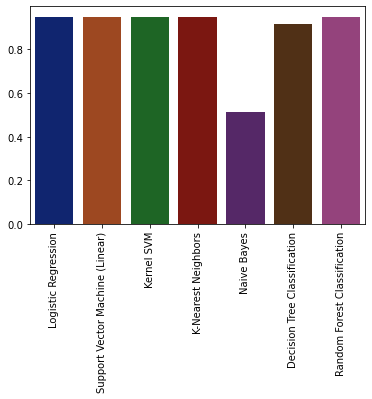

In [36]:
plt.xticks(rotation=90)
sns.barplot(x = model, y = accuracy, palette ='dark')